# SOUDA SHIP DETECTION

## Pre-requisites
1. gpt (SNAP) command working
2. PEPS Authorization Credentials (Singup)
3. Create & Activate a new conda environment and Install the following
    * conda install -c conda-forge folium
	* conda install -c conda-forge imageio
	* conda install -c conda-forge rasterio
	* conda install -c conda-forge eodag
4. Go to the working folder and run: jupyter-lab


## Troubleshooting
1. yaml content without "" in attributes. Instead of "{}" do {}
2. product.download() had error due to extraction inability. (extract manually and set product_path=" location of the extracted file" in python notebook -> product_path='C:\Programming\Snap\eodag_workspace_shipdetection\S1A_IW_GRDH_1SDV_20170501T165806_20170501T165831_016391_01B235_9CD1.SAFE')
3. auxdata for tutorial is located in the following link : https://github.com/CS-SI/eodag/tree/feat-search-multiple-providers/examples . If you do not have auxdata you can use the default parameters provided by gpt (in Land-Sea-Mask)
4. Be careful if you save data in E:\ folder but your notebook is located in C:\ (had some issues there)
5. !rio warp probably works fine if you save the outputs of gpt commands in eodag workspace
	if you save it on another drive (E:\ for example) you need to run rio warp manually from a new anaconda prompt after activating the conda environment : rio warp subset_visualization.tif subset_visualization_3587_test.tif --dst-crs="EPSG:3857" --resampling="bilinear" --overwrite

## CODE

In [2]:
# SAVE CREDENTIALS
import os
os.environ["EODAG__PEPS__AUTH__CREDENTIALS__USERNAME"] = "USERNAME"
os.environ["EODAG__PEPS__AUTH__CREDENTIALS__PASSWORD"] = "PASSWORD"

In [3]:
# import Libraries/modules used
import folium
import imageio
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from eodag.api.core import EODataAccessGateway
from eodag import setup_logging

In [4]:
setup_logging(verbose=2)

# Create the workspace folder.
workspace = 'Chania_SD'
if not os.path.isdir(workspace):
    os.mkdir(workspace)

In [5]:
#SETUP EVERYTHING TO DOWNLOAD FILES FROM PEPS

yaml_content = """
peps:
    download:
        outputs_prefix: {}
        extract: true
""".format(os.path.abspath(workspace))

print(yaml_content)



with open(os.path.join(workspace, 'eodag_conf.yml'), "w") as f_yml:
    f_yml.write(yaml_content.strip())

dag = EODataAccessGateway(os.path.join(workspace, 'eodag_conf.yml'))


peps:
    download:
        outputs_prefix: C:\Programming\Snap\Chania_SD
        extract: true



2022-01-24 11:54:20,443-15s eodag.config                     [INFO    ] Loading user configuration from: C:\Programming\Snap\Chania_SD\eodag_conf.yml
2022-01-24 11:54:20,634-15s eodag.core                       [INFO    ] Locations configuration loaded from C:\Users\razkey\.config\eodag\locations.yml


In [ ]:
product_type = 'S1_SAR_GRD'
extent = {
    'lonmin': 24.044031,
    'lonmax': 24.143720,
    'latmin': 35.462626,
    'latmax': 35.506875
}
products, estimated_nbr_of_results = dag.search(
    productType=product_type,
    start='2017-06-01',
    end='2017-09-02',
    geom=extent
)

In [9]:
#DEFINE product type + Region of Interest

product_type = 'S1_SAR_GRD'
extent = {
    'lonmin': 24.044031,
    'lonmax': 24.143720,
    'latmin': 35.462626,
    'latmax': 35.506875
}

In [10]:
# Search for products in the Database for a given period
products, estimated_nbr_of_results = dag.search(
    productType=product_type,
    start='2017-06-01',
    end='2017-09-02',
    geom=extent
)
products

2022-01-24 13:18:26,403-15s eodag.core                       [INFO    ] Searching product type 'S1_SAR_GRD' on provider: peps
2022-01-24 13:18:26,455-15s eodag.plugins.search.qssearch    [INFO    ] Sending count request: https://peps.cnes.fr/resto/api/collections/S1/search.json?startDate=2017-06-01&completionDate=2017-09-02&geometry=POLYGON ((24.0440 35.4626, 24.0440 35.5069, 24.1437 35.5069, 24.1437 35.4626, 24.0440 35.4626))&productType=GRD&maxRecords=1&page=1
2022-01-24 13:18:27,882-15s eodag.plugins.search.qssearch    [INFO    ] Sending search request: https://peps.cnes.fr/resto/api/collections/S1/search.json?startDate=2017-06-01&completionDate=2017-09-02&geometry=POLYGON ((24.0440 35.4626, 24.0440 35.5069, 24.1437 35.5069, 24.1437 35.4626, 24.0440 35.4626))&productType=GRD&maxRecords=20&page=1
2022-01-24 13:18:29,618-15s eodag.core                       [INFO    ] Found 30 result(s) on provider 'peps'


[EOProduct(id=S1B_IW_GRDH_1SDV_20170828T042315_20170828T042340_007135_00C936_217C, provider=peps), EOProduct(id=S1B_IW_GRDH_1SDV_20170827T162204_20170827T162229_007128_00C901_D6A0, provider=peps), EOProduct(id=S1A_IW_GRDH_1SDV_20170822T042412_20170822T042437_018031_01E44C_8E46, provider=peps), EOProduct(id=S1A_IW_GRDH_1SDV_20170821T162245_20170821T162310_018024_01E414_AFAD, provider=peps), EOProduct(id=S1B_IW_GRDH_1SDV_20170816T042315_20170816T042340_006960_00C424_1A37, provider=peps), EOProduct(id=S1B_IW_GRDH_1SDV_20170815T162203_20170815T162228_006953_00C3EF_98C1, provider=peps), EOProduct(id=S1A_IW_GRDH_1SDV_20170810T042411_20170810T042436_017856_01DEFD_5B3F, provider=peps), EOProduct(id=S1A_IW_GRDH_1SDV_20170809T162244_20170809T162309_017849_01DEC6_F8FC, provider=peps), EOProduct(id=S1B_IW_GRDH_1SDV_20170804T042314_20170804T042339_006785_00BF08_3CC4, provider=peps), EOProduct(id=S1B_IW_GRDH_1SDV_20170803T162203_20170803T162228_006778_00BED3_4917, provider=peps), EOProduct(id=S1A_IW

In [14]:
#Output region of products to check which one suits our goals
# Here I depict the 10th of the 20 proudcts Peps returned
emap = folium.Map([35.4, 24], zoom_start=7)

folium.Rectangle(
    bounds=[[extent["latmin"],extent["lonmin"]], [extent["latmax"], extent["lonmax"]]],
    color="red",
    tooltip="Search extent"
).add_to(emap)
layer = folium.features.GeoJson(
    data=products[0:4].as_geojson_object(),
    tooltip = folium.GeoJsonTooltip(fields=['title'])
).add_to(emap)
emap

In [11]:
#Get the product for download
product=products[9:10]
product=product[0]
print(product)

EOProduct(id=S1B_IW_GRDH_1SDV_20170803T162203_20170803T162228_006778_00BED3_4917, provider=peps)


In [ ]:
#DOWNLOAD PRODUCT 
#MIGHT HAVE SOME ISSUES WHEN DOWNLOADING, IF IT FAILS TRY ANOTHER PRODUCT
product_path = product.download()
from IPython.display import display, Image
loc1 = 'C:\Programming\Snap\Chania_SD\S1A_IW_GRDH_1SDV_20180501T042412_20180501T042437_021706_025716_20C9.SAFE'

product_path = loc1


product_path = product_path[7:] if product_path.startswith('file://') else product_path

prod = product_path
#product_path = prod
Image(os.path.join(prod, 'preview/quick-look.png'))

0.00B [00:00, ?B/s]

2022-01-23 10:52:15,854-15s eodag.plugins.download.base      [INFO    ] Download url: https://peps.cnes.fr/resto/collections/S1/48727a48-bd71-5aab-85ed-55ccbcf801d2/download
2022-01-23 10:52:16,730-15s eodag.plugins.download.http      [INFO    ] [Retry #1] Waiting 119s until next download try (retry every 2' for 20')


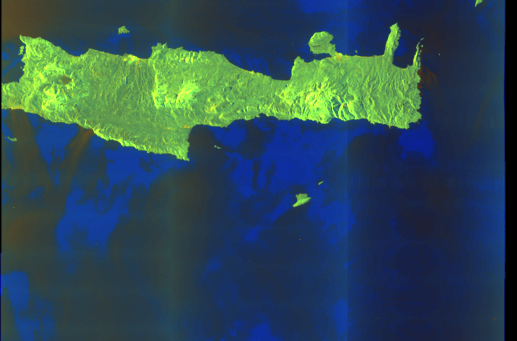

In [5]:
# For convenience I loaded a product that I have downloaded, and here is a Preview (Image is reversed)
from IPython.display import display, Image
loc1 = 'C:\Programming\Snap\Chania_SD\S1A_IW_GRDH_1SDV_20180501T042412_20180501T042437_021706_025716_20C9.SAFE'

product_path = loc1


product_path = product_path[7:] if product_path.startswith('file://') else product_path

prod = product_path
#product_path = prod
Image(os.path.join(prod, 'preview/quick-look.png'))

### Graph Process

#### Subset & Apply Orbit File
For subset I have to manually give the region area(need to do that automatically). Everything else is straightforward.

In [24]:
graph_subset = os.path.join(workspace, 'Subset.xml')
with open(graph_subset, 'w') as g_1:
    g_1.write(
"""
<graph id="Graph">
  <version>1.0</version>
    <node id="Read">
      <operator>Read</operator>
      <sources/>
      <parameters>
        <file>${inputproduct}</file>
      </parameters>
    </node>
    <node id="Subset">
      <operator>Subset</operator>
      <sources>
        <sourceProduct refid="Read"/>
      </sources>
      <parameters>
        <region>15225,1925,17150,3150</region>
        <copyMetadata>true</copyMetadata>
      </parameters>
    </node>
    <node id="Apply-Orbit-File">
      <operator>Apply-Orbit-File</operator>
      <sources>
        <sourceProduct refid="Subset"/>
      </sources>
    </node>
    <node id="Write">
      <operator>Write</operator>
      <sources>
        <sourceProduct refid="Apply-Orbit-File"/>
      </sources>
      <parameters>
        <file>${outputproduct}</file>
      </parameters>
    </node>
</graph>
"""
)

In [25]:
os.environ['LD_LIBRARY_PATH'] = '.'
!gpt {graph_subset} -Pinputproduct={product_path} -Poutputproduct={os.path.join(workspace, 'S1A_IW_GRDH_1SDV_20180501T042412_20C9_Orb_new')}

Executing processing graph

INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Incompatible GDAL 3.3.3 found on system. Internal GDAL 3.0.0 from distribution will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.hsqldb.persist.Logger: dataFileCache open start



....10%....20%....30%....40%....50%....60%....70%....80%....90% done.


#### Ship Detection
1.  mask the land using default settings.
2. Calibrate VH,VV and choose SigmaBand
3. AdaptiveThresholding (To find objects in the ocean) 
    * smallest ship is 30m long
    * largest ship is 500m long
4. ObjectDiscrimination (Default parameters 30 and 600
.

In [31]:
graph_process = os.path.join(workspace, 'ShipDetection.xml')
with open(graph_process, 'w') as g_2:
    g_2.write(
"""
<graph id="Graph">
  <version>1.0</version>
    <node id="Read">
      <operator>Read</operator>
      <sources/>
      <parameters>
        <file>${inputproduct}</file>
      </parameters>
    </node>
    <node id="Land-Sea-Mask">
      <operator>Land-Sea-Mask</operator>
      <sources>
        <sourceProduct refid="Read"/>
      </sources>
      <parameters>
        <landMask>true</landMask>
        <useSRTM>true</useSRTM>
        <invertGeometry>false</invertGeometry>
        <shorelineExtension>10</shorelineExtension>
      </parameters>
    </node>
    <node id="Calibration">
      <operator>Calibration</operator>
      <sources>
        <sourceProduct refid="Land-Sea-Mask"/>
      </sources>
      <parameters>
        <selectedPolarisations>VH,VV</selectedPolarisations>
        <outputSigmaBand>true</outputSigmaBand>
      </parameters>
    </node>
    <node id="AdaptiveThresholding">
      <operator>AdaptiveThresholding</operator>
      <sources>
        <sourceProduct refid="Calibration"/>
      </sources>
      <parameters>
        <targetWindowSizeInMeter>30</targetWindowSizeInMeter>
        <guardWindowSizeInMeter>500.0</guardWindowSizeInMeter>
        <backgroundWindowSizeInMeter>800.0</backgroundWindowSizeInMeter>
        <pfa>12.5</pfa>
      </parameters>
    </node>
    <node id="Object-Discrimination">
      <operator>Object-Discrimination</operator>
      <sources>
        <sourceProduct refid="AdaptiveThresholding"/>
      </sources>
      <parameters>
        <minTargetSizeInMeter>30</minTargetSizeInMeter>
        <maxTargetSizeInMeter>600</maxTargetSizeInMeter>
      </parameters>
    </node>
    <node id="Write1">
      <operator>Write</operator>
      <sources>
        <sourceProduct refid="Object-Discrimination"/>
      </sources>
      <parameters>
        <file>${outputproduct1}</file>
      </parameters>
    </node>
    <node id="Write2">
      <operator>Write</operator>
      <sources>
        <sourceProduct refid="Object-Discrimination"/>
      </sources>
      <parameters>
        <file>${outputproduct2}</file>
        <formatName>Geotiff</formatName>
      </parameters>
    </node>
</graph>
"""
)

In [27]:
outPos = 'E:\SnapOuts'
print(workspace)

Chania_SD


In [33]:
!gpt {graph_process} -Pinputproduct={os.path.join(workspace, 'subset_0_of_S1A_IW_GRDH_1SDV_20180501T042412_20180501T042437_021706_025716_20C9_Orb.dim')} -Poutputproduct1={os.path.join(outPos, 'S1A_IW_GRDH_1SDV_20180501T042412_20C9_processed')} -Poutputproduct2={os.path.join(outPos, 'S1A_IW_GRDH_1SDV_20180501T042412_20C9_processed')}

Executing processing graph
....10%....20%....31%....41%....52%....62%....73%....83%... done.


INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Incompatible GDAL 3.3.3 found on system. Internal GDAL 3.0.0 from distribution will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.hsqldb.persist.Logger: dataFileCache open start


#### Graph Vizualisation
1. Subset the processed product
2. Apply Terrain Correction

In [34]:
graph_visu = os.path.join(workspace, 'vizualisation_ships.xml')
with open(graph_visu, 'w') as g_3:
    g_3.write(
"""
<graph id="Graph">
  <version>1.0</version>
    <node id="Read">
      <operator>Read</operator>
      <sources/>
      <parameters>
        <file>${inputproduct}</file>
      </parameters>
    </node>
    <node id="SubSet">
      <operator>Subset</operator>
      <sources>
        <sourceProduct refid="Read"/>
      </sources>
      <parameters>
        <region>0,1000,10000,10000</region>
      </parameters>
    </node>
    <node id="Terrain-Correction">
      <operator>Terrain-Correction</operator>
      <sources>
        <sourceProduct refid="SubSet"/>
      </sources>
      <parameters>
        <sourceBands>Sigma0_VH_ship_bit_msk</sourceBands>
        <nodataValueAtSea>False</nodataValueAtSea>
      </parameters>
    </node>
    <node id="Write">
      <operator>Write</operator>
      <sources>
        <sourceProduct refid="Terrain-Correction"/>
      </sources>
      <parameters>
        <file>${outputproduct}</file>
        <formatName>Geotiff</formatName>
      </parameters>
    </node>
</graph>
"""
)

In [35]:
!gpt {graph_visu} -Pinputproduct={os.path.join(outPos, 'S1A_IW_GRDH_1SDV_20180501T042412_20C9_processed.dim')} -Poutputproduct={os.path.join(outPos, 'subset_visualization')}

Executing processing graph

INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Incompatible GDAL 3.3.3 found on system. Internal GDAL 3.0.0 from distribution will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.hsqldb.persist.Logger: dataFileCache open start
INFO: org.esa.snap.core.datamodel.Product: raster height 751 not equal to 1751
INFO: org.esa.snap.core.datamodel.Product: raster width 3793 not equal to 2976



...12%...24%...36%...48%...60%...72%...84%.. done.


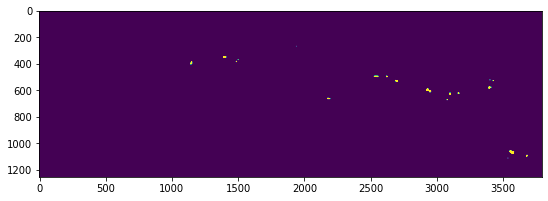

In [38]:
with rasterio.open(os.path.join(outPos, 'subset_visualization.tif')) as souda_port_tif:
    souda_port = souda_port_tif.read(1)
# Display the image as is with matplotlib
plt.figure(figsize=(9, 9))
im = plt.imshow(souda_port, vmax=0.06)

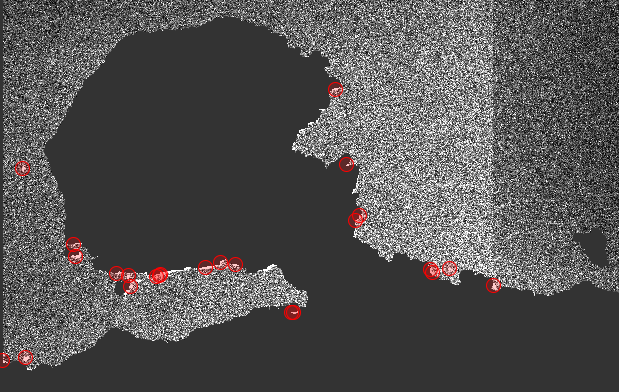

In [46]:
# RESULTS (GRAY IS LAND, LIGHT GRAY IS SEA)

from IPython.display import Image
Image("C:\Programming\Snap\Chania_SD\DetectionOverlay.png")

### End Results

In [43]:
import csv
from itertools import islice

m = folium.Map([35.4, 24], zoom_start=10, tiles='openstreetmap')
with open(os.path.join(
    outPos, 'S1A_IW_GRDH_1SDV_20180501T042412_20C9_processed.data',
    'vector_data', 'ShipDetections.csv'
), 'rt', encoding='utf-8') as data:
    for i in islice(csv.reader(data, delimiter='\t'), 2, None):
        folium.CircleMarker(
            [float(i[4]), float(i[5])], popup='Ship'
        ).add_to(m)
m